# Predicting House Prices
## Regression Project ##


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.special import inv_boxcox

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import linear_model

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Introduction: Problem<a name="introduction"></a>

## House Prices: Advanced Regression Techniques
The dataset for this project was acquired from Kaggle and it describes sales of individual residential properties in Ames, Iowa 

In this project, we'll predict house prices by training a <b>regression</b> model

We'll select features from the dataset which have a high correlation with the <b>Sale Price</b>, our target variable. 



<img src = "files/Housing_Prices.jpg">

# Data<a name="data"></a>

#### Load the Data, Examine and Explore

In [2]:
# Load in the Ames Housing Data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#### Let's analyse the features of this dataset

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# This is recommended by the data set author to remove a few outliers
data = df_train.copy() # Keep a copy our original data 
# df_test = df_test.loc[df_test['GrLivArea'] <= 4000,:]
df_train = df_train.loc[df_train['GrLivArea'] <= 4000,:]
print("Number of rows in the data:", df_train.shape[0])
print("Number of columns in the data:", df_train.shape[1])

Number of rows in the data: 1456
Number of columns in the data: 81


In [5]:
df_train.iloc[:, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## We have 79 features 



### Normalizing Target Variable
Let's inspect the <b>Sale Price</b>, our target variable

In [6]:
SP = df_train['SalePrice']
SP.describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

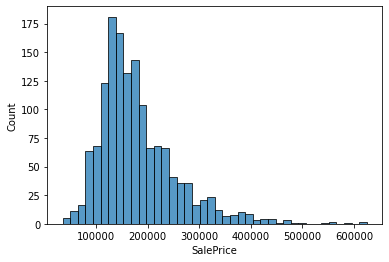

In [7]:
sns.histplot(data = df_train['SalePrice'])

In [8]:
SP_sample = SP.sample(n=50,random_state = 1)
normaltest(SP_sample)

NormaltestResult(statistic=48.77156502307902, pvalue=2.566783378742388e-11)

Making the target variable normally distributed often leads to better results

Sale Price is not normally distributed, we will apply a transformation to it and then fit our regression to predict the transformed values

It's not necessary for the Linear Regression algorithm to have a y variable that is normally distributed; however, it is necessary for the errors to be normally distributed and one way to ensure this is by transforming the y variable

We'll use <b>histograms</b> and the <b>D'Agostino K^2 Test</b> to determine normality




There are three transformations that we can apply:
<b></b>
<li>Square root
<li>Log
<li>Box cox

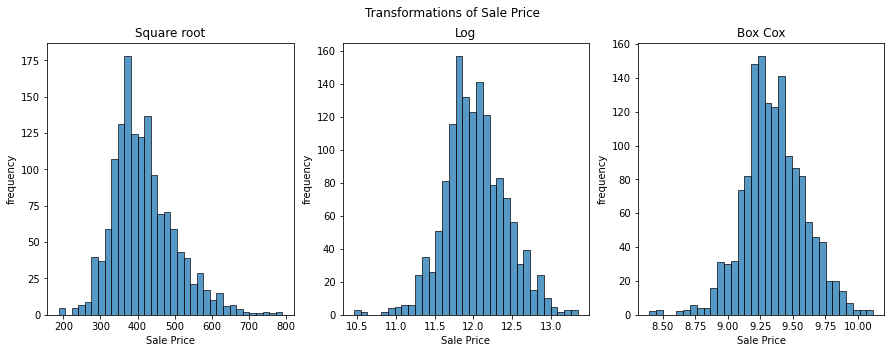

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# Applying transforms
SP_sq = np.sqrt(SP)
SP_log = np.log(SP)
SP_Bxc_result = boxcox(SP)
SP_Bxc = SP_Bxc_result[0]
SP_Bxc_lam = SP_Bxc_result[1]

# Displaying Histograms alongisde statistical score
# SP_sq.hist(ax = ax1)
# SP_log.hist(ax = ax2)
# SP_Bxc.hist(ax = ax3)

sns.histplot(data = SP_sq, ax = ax1)
sns.histplot(data = SP_log, ax = ax2)
sns.histplot(data = SP_Bxc, ax = ax3)

# formatting of titles
ax1.set(title='Square root', ylabel='frequency', xlabel='Sale Price')
ax2.set(title='Log', ylabel='frequency', xlabel='Sale Price')
ax3.set(title='Box Cox', ylabel='frequency', xlabel='Sale Price')
fig.suptitle('Transformations of Sale Price');

Computing D'Agostino K^2 test results

#### Interpreting the D'Agostino K^2 score
This test outputs a "p-value". The larges the p-value, the closer the distribution is to normal.

We will take a <b>small sample</b> of each distribution as the test detects even minor deviations in very large samples.


In [10]:
SP_sq_sample = np.random.choice(SP_sq, 250)
SP_log_sample = np.random.choice(SP_log, 250)
SP_Bxc_sample = np.random.choice(SP_Bxc, 250)

normaltest_sq = normaltest(SP_sq_sample)[1]
normaltest_log = normaltest(SP_log_sample)[1]
normaltest_Bxc = normaltest(SP_Bxc_sample)[1]

In [11]:
column = {'Transformation' :['Square Root','Log','Box Cox'],
         'D\'Agostino K^2 Score (p-value)': [normaltest_sq,normaltest_log,normaltest_Bxc]}
normal_scores_df = pd.DataFrame(column)
normal_scores_df.set_index('Transformation')

,D'Agostino K^2 Score (p-value)
Transformation,
Square Root,0.041892
Log,0.054195
Box Cox,0.022762


According to frequentist statistics we can declare the distribution to be normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


According to our scores, the p values of Log and Box Cox Transformations are <b>above 0.05</b> and since the p value changes every time we sample; <b>We'll sample multiple times and consider the transformation that consistently results in a lower p value.</b> ,The choice of transformation between Log and Boxcox is an innocuous one as both have a similar effect on precision we'll apply the BoxCox transformation to our target variable

### Handling Missing Data

We'll extract columns that have missing values

## Missing values in training set

In [12]:
missing_percent_train = []
missing_percent_cols_train = []
for col_count,col in zip(df_train.count(),df_train.columns):
    percent = ((1456-col_count)/1456) * 100
    if percent != 0:
        missing_percent_train.append(percent)
        missing_percent_cols_train.append(col)
columns = {"Column":missing_percent_cols_train, "% Of Missing Value": missing_percent_train}
missing_df = pd.DataFrame(columns)
missing_df

,Column,% Of Missing Value
0,LotFrontage,17.788462
1,Alley,93.750000
2,MasVnrType,0.549451
3,MasVnrArea,0.549451
4,BsmtQual,2.541209
5,BsmtCond,2.541209
6,BsmtExposure,2.609890
7,BsmtFinType1,2.541209
8,BsmtFinType2,2.609890
9,Electrical,0.068681


## Missing values in test set

In [13]:
missing_percent_test = []
missing_percent_cols_test = []
for col_count,col in zip(df_test.count(),df_test.columns):
    percent = ((1459-col_count)/1459) * 100
    if percent != 0:
        missing_percent_test.append(percent)
        missing_percent_cols_test.append(col)
columns = {"Column":missing_percent_cols_test, "% Of Missing Value": missing_percent_test}
missing_df_test = pd.DataFrame(columns)
missing_df_test

,Column,% Of Missing Value
0,MSZoning,0.274160
1,LotFrontage,15.558602
2,Alley,92.666210
3,Utilities,0.137080
4,Exterior1st,0.068540
5,Exterior2nd,0.068540
6,MasVnrType,1.096642
7,MasVnrArea,1.028101
8,BsmtQual,3.015764
9,BsmtCond,3.084304


Let's remove columns with more than 75% of missing values

In [14]:
missing_df[missing_df['% Of Missing Value'] > 75]

missing_cols_75 = missing_df[missing_df['% Of Missing Value'] > 75]
missing_cols_75_cols = missing_cols_75['Column'].tolist()

missing_cols_75

,Column,% Of Missing Value
1,Alley,93.750000
16,PoolQC,99.656593
17,Fence,80.769231
18,MiscFeature,96.291209


In [15]:
missing_cols_75 = missing_df[missing_df['% Of Missing Value'] > 75]
missing_cols_75_cols = missing_cols_75['Column'].tolist()

df_train.drop(missing_cols_75_cols, axis = 1, inplace = True)
df_test.drop(missing_cols_75_cols, axis = 1, inplace = True)

### Let's Impute Missing Values

In [16]:
# Missing garage data indicates no cars
for column in ('GarageYrBlt', 'GarageArea', 'GarageCars','GarageType','GarageQual','GarageFinish'):
    df_train[column] = df_train[column].fillna(0)
    df_test[column] = df_test[column].fillna(0)

In [17]:
# Missing values for basement implies no basement
for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[column] = df_train[column].fillna(0)
    df_test[column] = df_test[column].fillna(0)

We'll define a function to handle missing values and pass the names of columns containing missing values as the argument

In [18]:
def impute_missing(column):
    info = df_train[column].describe()
    if df_train[column].dtype != 'O':
        if info[1] > info[2]:              #If mean is larger than standard deviation impute with median else impute with mean
            impute_value = df_train[column].median()    
        else:
            impute_value = info[1]
    else:                                            
        impute_value = df_train[column].mode()[0]    #If datatype is object then impute with mode
        
#     imputing missing values in train and test set
    df_train.loc[df_train[column].isna(),column] = impute_value
    df_test.loc[df_test[column].isna(),column] = impute_value
        

Imputing missing values in training set

In [19]:
missing_percent_train = []
missing_percent_cols_train = []
for col_count,col in zip(df_train.count(),df_train.columns):
    percent = ((1456-col_count)/1456) * 100
    if percent != 0:
        missing_percent_train.append(percent)
        missing_percent_cols_train.append(col)
        
for column in missing_percent_cols_train:
    impute_missing(column)

Imputing missing values in test set

In [20]:
missing_percent_test = []
missing_percent_cols_test = []
for col_count,col in zip(df_test.count(),df_test.columns):
    percent = ((1459-col_count)/1459) * 100
    if percent != 0:
        missing_percent_test.append(percent)
        missing_percent_cols_test.append(col)
        
for column in missing_percent_cols_test:
    impute_missing(column)

#### All of the missing data has been handled

### Transforming predictor variables for optimal model performance

We'll extract continuous predictor variables that are skewed and apply a log transform to make them more normally distributed

In [21]:
# Collecting float variables
mask = df_train.dtypes == np.float
float_cols = df_train.columns[mask]

# Identifying variables that are skewed
skew_values = df_train[float_cols].skew()

skew_cols = (skew_values
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > 0.7'))

skew_cols

,Skew
LotFrontage,1.711457
MasVnrArea,2.656279
GarageYrBlt,-3.863232


In [22]:
for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    df_train[col] = df_train[col].apply(np.log1p)
    df_test[col]  = df_test[col].apply(np.log1p)

In [23]:
num_predictor_variables = df_train.select_dtypes(include=[np.number])

One hot encoding categorical variables

In [24]:
# removing categorical features
cat_remove = ['Street','Utilities','Condition2','RoofMatl','Heating','PoolArea','MiscVal']
df_train.drop(cat_remove, axis =1, inplace = True)
df_test.drop(cat_remove, axis =1, inplace = True)

In [25]:
X = pd.get_dummies(df_train.drop(['SalePrice'], axis = 1))     
df_test = pd.get_dummies(df_test)      
X, test = X.align(df_test, join='inner', axis=1) 

In [26]:
X.shape

(1456, 250)

In [27]:
test.shape

(1459, 250)

In [28]:
df_train = pd.concat([X, df_train['SalePrice']], axis=1)

# Analysis<a name="analysis"></a>

## Exploratory Data Analysis

Let's explore our dataset for patterns and relationships between the target and predictor

Analysing correlation between predictor and target

In [29]:
corr = num_predictor_variables.corr()
print (corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
Fireplaces       0.466765
MasVnrArea       0.423173
BsmtFinSF1       0.395923
OpenPorchSF      0.330361
LotFrontage      0.328816
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
GarageYrBlt      0.246582
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
Id              -0.027455
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePr

The number of attributes seems involved; however, we'll only consider those attributes that have a siginificant correlation and remove any superfluous attributes using a heatmap

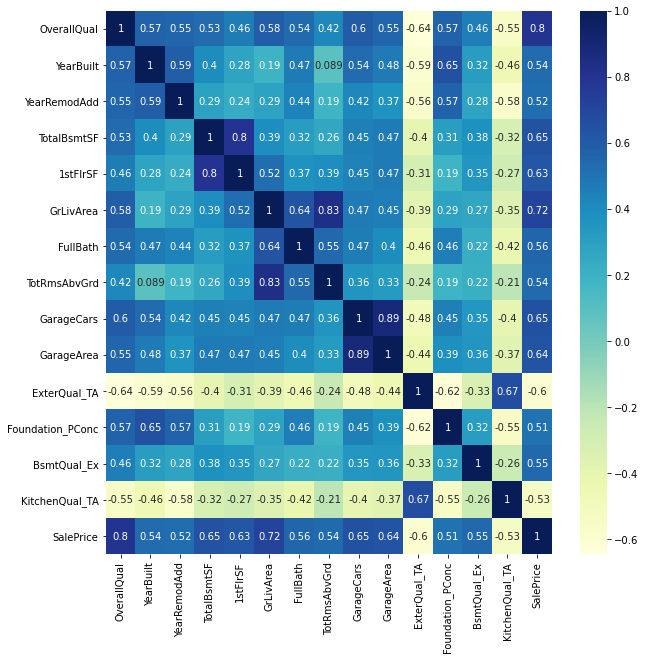

In [30]:
corr_matrix = df_train.corr()
num_predictors = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.50]
num_predictors_to_remove = corr_matrix.index[abs(corr_matrix["SalePrice"])<0.25]
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df_train[num_predictors].corr(),annot=True,cmap="YlGnBu")

Let's select features which have a correlation magnitude <b>greater</b> than 0.6

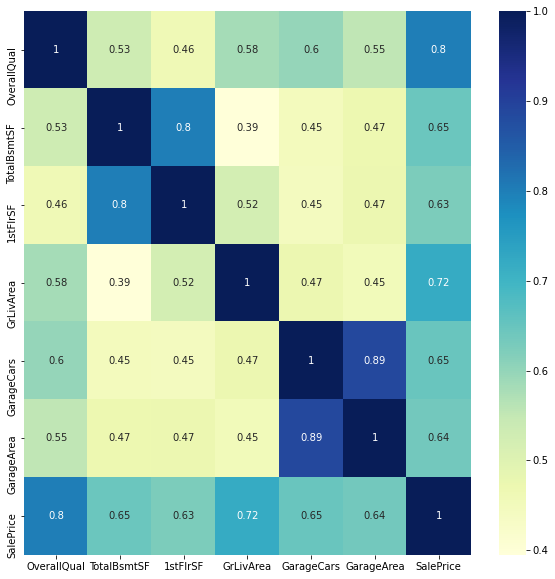

In [31]:
corr_matrix = df_train.corr()
num_predictors = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.60]
num_predictors_to_remove = corr_matrix.index[abs(corr_matrix["SalePrice"])<0.25]
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df_train[num_predictors].corr(),annot=True,cmap="YlGnBu")

'OverallQual' has the highest correlation with our target followed by Year variables, this makes sense as recently built houses generally have higher prices

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

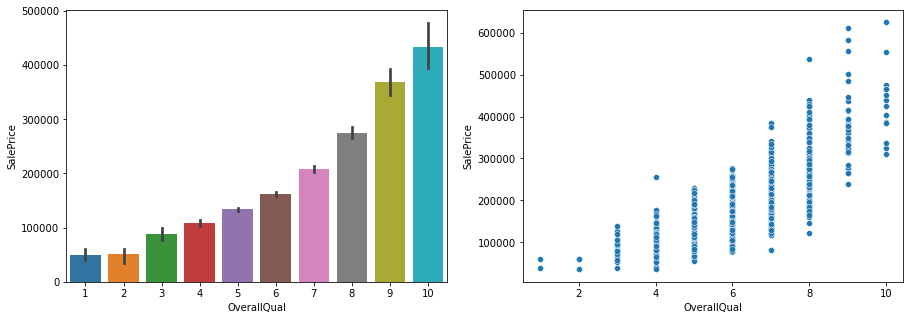

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x = 'OverallQual', y= 'SalePrice',data = df_train, ax = ax1)
sns.scatterplot(x = 'OverallQual', y= 'SalePrice', data = df_train,ax = ax2)

OverallQual seems to have a non linear  relationship, we can square this column to achieve linearity

In [33]:
df_train['OverallQ2'] = df_train['OverallQual'] ** 2
X['OverallQ2'] = df_train['OverallQ2']
test['OverallQ2'] = df_test['OverallQual']**2

<AxesSubplot:xlabel='OverallQ2', ylabel='SalePrice'>

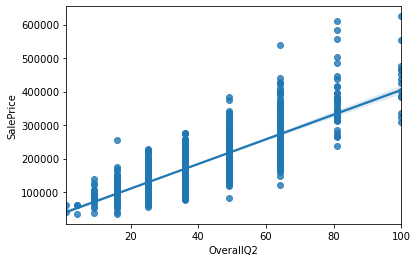

In [34]:
sns.regplot(x = 'OverallQ2', y= 'SalePrice', data = df_train)

Let's take a closer look at the correlation of Total Basement Square ft. and Ground floor Living Area

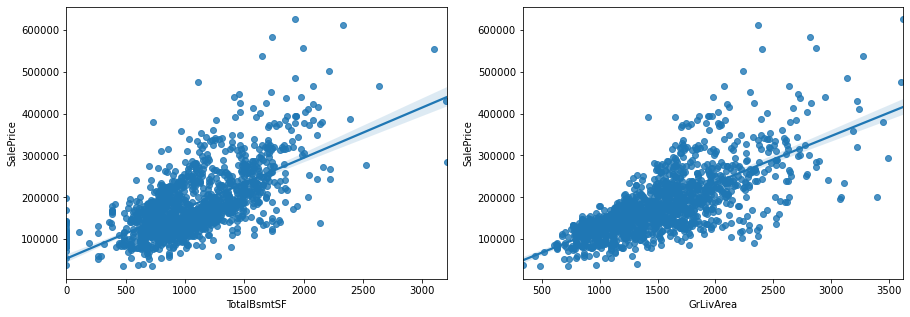

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x = 'TotalBsmtSF', y= 'SalePrice', data = df_train,ax = ax1)
sns.regplot(x = 'GrLivArea', y= 'SalePrice',data = df_train, ax = ax2);

We can combine these two features since they are highly correlated

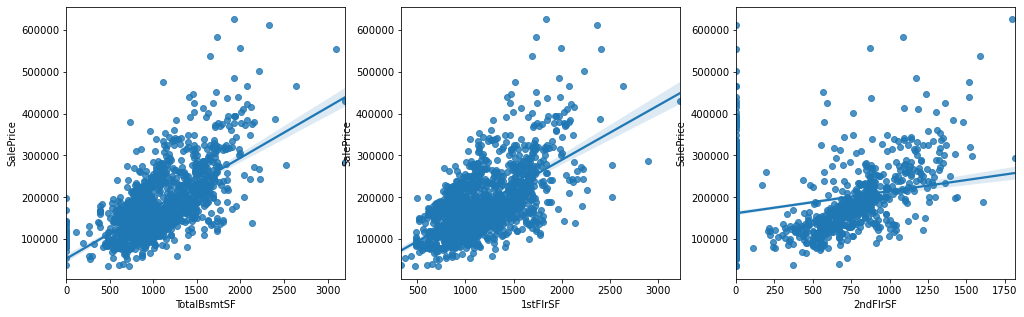

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(17,5))
sns.regplot(x = 'TotalBsmtSF', y= 'SalePrice', data = df_train,ax = ax1)
sns.regplot(x = '1stFlrSF', y= 'SalePrice',data = df_train, ax = ax2)
sns.regplot(x = '2ndFlrSF', y= 'SalePrice',data = df_train, ax = ax3);

We can combine these 3 features to form a new feature since they are correlated

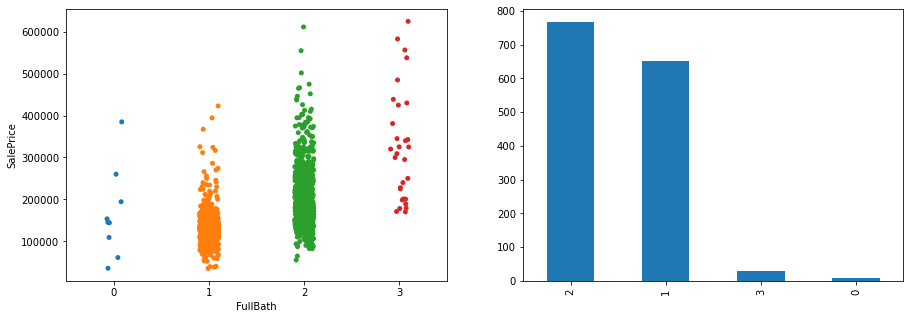

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
sns.stripplot(x = 'FullBath', y= 'SalePrice', data = df_train, ax = ax1)
df_train['FullBath'].value_counts().plot(kind = 'bar',ax = ax2);

The price increases with the number of bathrooms; however, most houses seem to have 2 bathrooms and only the most expensive have 3 bathrooms

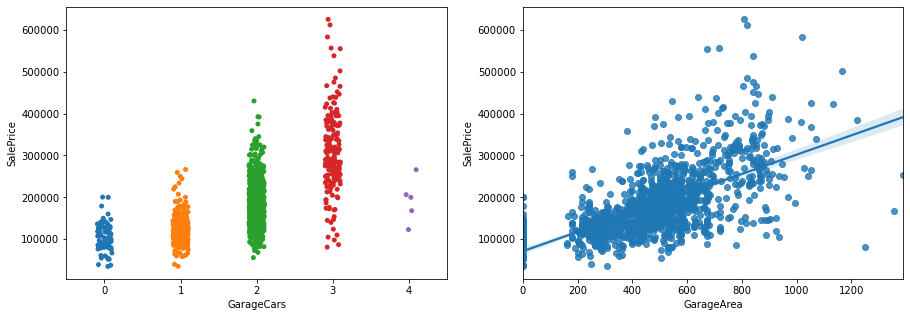

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
sns.stripplot(x = 'GarageCars', y= 'SalePrice', data = df_train,ax = ax1)
sns.regplot(x = 'GarageArea', y= 'SalePrice',data = df_train, ax = ax2);

Notice that the Sale Price drops once we have more than 3 Garage Cars

## Feature Engineering

We'll select features from our dataset to train our model

### Creating new features

There's clearly a premium on houses which were built more recently and have a higher overall quality 

In [39]:
X['OvQlt*YrBlt'] = df_train['OverallQual'] * df_train['YearBuilt']
test['OvQlt*YrBlt'] = df_test['OverallQual'] * df_test['YearBuilt']

We can divide the overall quality by the lot area to get a term which represents the overall quality per sqft

In [40]:
X['OvQlt/LotA'] = df_train['OverallQual'] / df_train['LotArea']
test['OvQlt/LotA'] = df_test['OverallQual'] / df_test['LotArea']

X.drop(['OverallQual'], axis = 1, inplace = True)
test.drop(['OverallQual'], axis = 1, inplace = True)

A term to represent the Total Square Footage of a house

In [41]:
X['Total_Sq'] = df_train['TotalBsmtSF'] + df_train['GrLivArea']
test['Total_Sq'] = df_test['TotalBsmtSF'] + df_test['GrLivArea']

Before proceeding, let's remove variables which have negligible impact on the target

In [42]:
X.drop(num_predictors_to_remove, axis = 1, inplace = True)
test.drop(num_predictors_to_remove, axis = 1, inplace = True)

# Modelling <a name="modelling"></a>

In [43]:
# Let's split our training set
df_train['SalePrice'] = SP_Bxc #Box Cox Transformation of Target variable to make it more normally distributed
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

<b> Regularization a.k.a desensitization is very useful in analysing datasets which have a lot of variables</b> <br>
    We will model our raw data using Linear, Ridge, and Lasso Regression using a pipeline

Finding the optimal value for hyperparameter alpha

In [44]:
regr = linear_model.LinearRegression()

regr.fit (X_train, y_train)
# The coefficients & score
MLR_r2 = r2_score(y_test, regr.predict(X_test))
print (regr.coef_ , MLR_r2)

[ 9.51105866e-03  6.83730919e-07  1.83095747e-04  9.01819680e-04
 -6.21019050e-03  5.07084890e-05  5.26861581e-06  5.15179000e-05
  5.64096255e-05  4.01119321e-05  2.76700974e-03  1.50156237e-02
  3.04952485e-04  2.28537934e-02  1.35528276e-02  4.33050551e-05
  2.57723510e-05  5.58226227e-05 -2.90867191e-02 -8.42913092e-03
  2.29316666e-02  1.04451200e-02 -1.03535781e-02 -4.87391381e-03
 -2.25011145e-02  1.51079728e-02  4.03190228e-02  1.91392906e-02
  1.16045864e-02  1.73231171e-03  4.47430374e-03  3.48067993e-02
  9.82349105e-03  5.70292132e-04  3.24083281e-02 -8.03119546e-03
  5.90140155e-03  1.01513366e-02 -9.92874474e-03 -3.41514458e-02
  3.41514458e-02  5.72748085e-02  1.27978153e-02 -2.97119804e-03
  2.38606371e-02  2.81020104e-02  1.19982848e-03 -5.94654446e-04
  1.92878277e-02  3.22446776e-01  2.50101400e-02 -2.62542858e-01
 -5.35156880e-03  5.54395870e-05 -3.21604935e+01  4.53810432e-05] 0.8691604482461454


In [45]:
# RidgeCV automatically returns the optimal alpha hyperparameter
alphas1 = np.geomspace(1, 20, 30)

ridgeCV = RidgeCV(alphas=alphas1, 
                  cv=5).fit(X_train, y_train)

ridgeCV_r2 = r2_score(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_r2)

18.037107446454083 0.877329472693321


In [46]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  tol = 0.06,
                  cv=3).fit(X_train, y_train)

lassoCV_r2 = r2_score(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_r2) 

1e-05 0.8662326326723686


In [47]:
accuracy_scores  = {'Regression Algorithm' :['Multiple Linear Regression','Ridge Regression','Lasso Regression'],
                   'R^2 Score': [MLR_r2, ridgeCV_r2, lassoCV_r2]}
                   
accuracy_scores_df = pd.DataFrame(accuracy_scores)
accuracy_scores_df.set_index('Regression Algorithm')

,R^2 Score
Regression Algorithm,
Multiple Linear Regression,0.869160
Ridge Regression,0.877329
Lasso Regression,0.866233


Ridge performs slightly better as it doesn't cancel elements out by labelling their coefficients to 0(like Lasso)

In [48]:
train_predictions = ridgeCV.predict(X)

# Let's plot the actual values with our predicted values

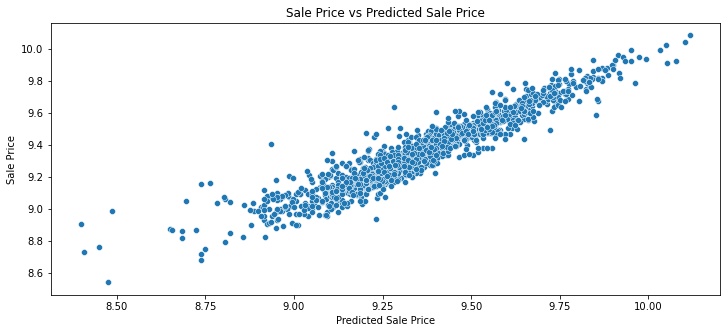

In [49]:
plt.figure(figsize = (12,5))
ax = sns.scatterplot(x=y,y=train_predictions);
ax.set(title='Sale Price vs Predicted Sale Price', ylabel='Sale Price', xlabel='Predicted Sale Price');

In [50]:
predictions = ridgeCV.predict(test)

In [51]:
r2_score(y_test, ridgeCV.predict(X_test))

0.877329472693321

# Results <a name="results"></a>

Applying inverse BoxCox transform

In [52]:
predictions_final = inv_boxcox(predictions,SP_Bxc_lam)

In [53]:
columns = {'Id' : df_test['Id'], 'SalePrice' : predictions_final}
submission_dataframe = pd.DataFrame(columns)
submission_dataframe.set_index('Id')
submission_dataframe

,Id,SalePrice
0,1461,116463.078506
1,1462,158238.501622
2,1463,178587.143504
3,1464,195427.072696
4,1465,185080.311568
...,...,...
1454,2915,82789.992122
1455,2916,90677.691906
1456,2917,172343.363002
1457,2918,113967.168695


In [54]:
submission_dataframe.to_csv('final_submission.csv' , index = False)

Root Mean Logarithmic Score of Submission = 0.13286